# BASICS 01 - Spatiotemporal Surfaces

In [2]:
%load_ext autoreload
%autoreload 2
%cd '../HOTS'
%matplotlib inline

/home/antoine/hots/HOTS/HOTS


In [3]:
import numpy as np
import matplotlib.pyplot as plt
# import cv2
import time

from mix_TimeSurface import *
from ToolsMonitor import DisplayImage
from Event import Event

# Loading the events

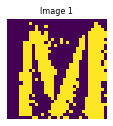

In [3]:
event0 = Event(ImageSize=(32, 32), ListPolarities=[-1, 1])

event0.LoadFromMat("../Data/alphabet_ExtractedStabilized.mat", image_number=15)

DisplayImage([event0])

# Creating the SpatioTemporal Surface

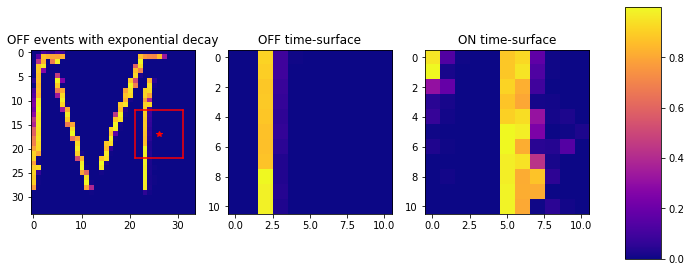

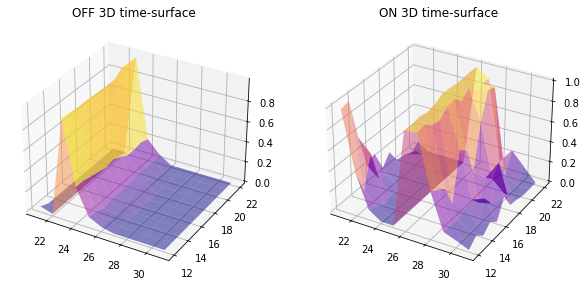

In [4]:
target_event = 20000
SpTe = TimeSurface(R=5,tau=0.02,camsize=[34,34], sigma=1)
i = 0
while i<target_event+1:
    TS, activ = SpTe.addevent(event0.address[i,1],event0.address[i,0],event0.time[i], event0.polarity[i])
    i+=1
    
SpTe.plote()

SpTe.plot3D()

## Testing a bigger $\tau$

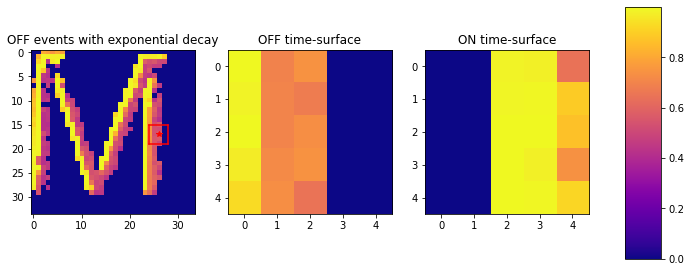

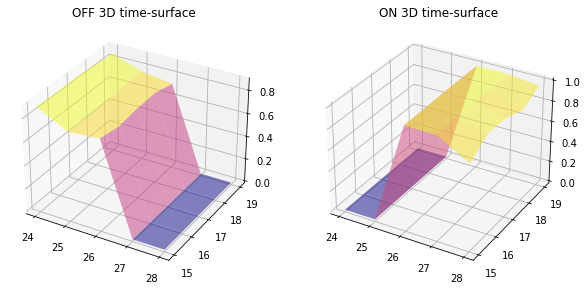

In [5]:
target_event = 20000
SpTe2 = TimeSurface(R=2,tau=0.2,camsize=[34,34])
i = 0
while i<target_event+1:
    TS, activ = SpTe2.addevent(event0.address[i,1],event0.address[i,0],event0.time[i], event0.polarity[i])
    i+=1
    
SpTe2.plote()

SpTe2.plot3D()

# With tonic

In [5]:
import tonic
learningset = tonic.datasets.NMNIST(save_to='../Data/',
                                train=False,
                                transform=None)

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


In [6]:
loader = tonic.datasets.DataLoader(learningset, shuffle=True)

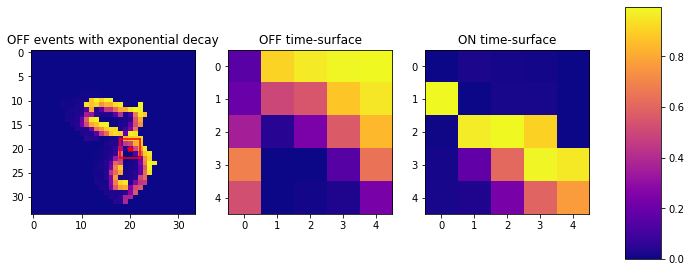

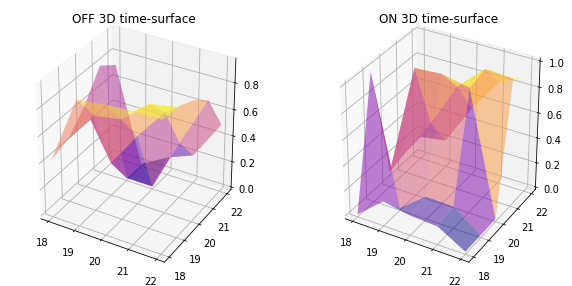

In [61]:
target_event = 2000
SpTetonic = TimeSurface(R=2,tau=5*10e3,camsize=[34,34])
events, target = next(iter(loader))
print(events.size())
iev = 0
while iev<target_event:
    x,y,t,p = events[0][iev][learningset.ordering.find("x")].item(), \
                events[0][iev][learningset.ordering.find("y")].item(), \
                events[0][iev][learningset.ordering.find("t")].item(), \
                events[0][iev][learningset.ordering.find("p")].item(),
    TS, activ = SpTetonic.addevent(x,y,t,p)
    iev+=1
    
SpTetonic.plote()

SpTetonic.plot3D()

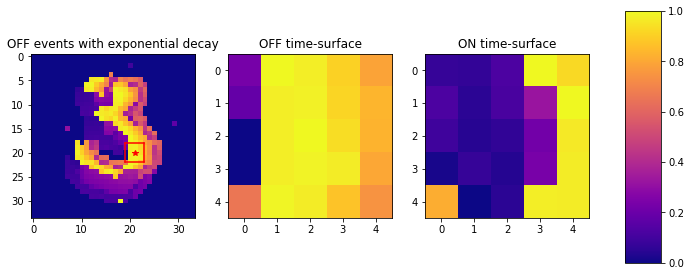

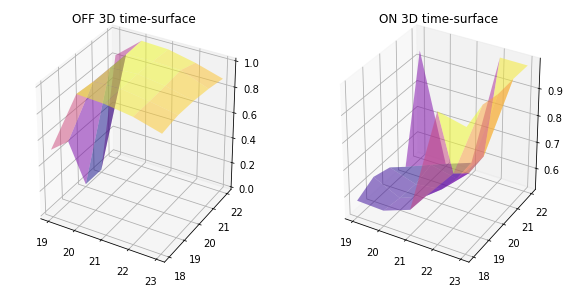

In [34]:
iev = 0
SpTetonic = TimeSurface(R=2,tau=20*10e3,camsize=[34,34])
while iev<4000:
    x,y,t,p = events[0][iev][learningset.ordering.find("x")].item(), \
                events[0][iev][learningset.ordering.find("y")].item(), \
                events[0][iev][learningset.ordering.find("t")].item(), \
                events[0][iev][learningset.ordering.find("p")].item(),
    TS, activ = SpTetonic.addevent(x,y,t,p)
    iev+=1
    
SpTetonic.plote()

SpTetonic.plot3D()